In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from backtester import backtester
from strat import *
from pykalman import KalmanFilter
pd.set_option('display.max_rows', 1001)

In [2]:
data = pd.read_csv("data.csv")

In [3]:
ticker_dict = {}

for ticker in data.ticker.unique():
        data_tmp = data.loc[data["ticker"] == ticker]
        data_tmp['ret'] = data_tmp['last'].pct_change()
        data_tmp['log_ret'] = np.log(data_tmp['last']) - np.log(data['last'].shift(1))
        ticker_dict[ticker] = data_tmp.set_index('date')

<ipython-input-3-cc4c70664471>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp['ret'] = data_tmp['last'].pct_change()
<ipython-input-3-cc4c70664471>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp['log_ret'] = np.log(data_tmp['last']) - np.log(data['last'].shift(1))


In [4]:
uni_date = sorted(data.date.unique())

In [5]:
data_price = pd.DataFrame(index = uni_date)

for ticker in data.ticker.unique():
    data_price[ticker] = ticker_dict[ticker]['last']

In [6]:
data_price.iloc[0:1500].corr()

,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
1332 JT,1.000000,0.842439,0.371189,-0.123230,0.811265,0.887534,0.907543,0.853437,0.408318,0.878939,...,0.615218,0.203889,0.559194,0.908722,0.908177,-0.174258,0.922747,0.843167,0.426209,0.567814
1333 JT,0.842439,1.000000,NaN,-0.113875,0.874995,0.872873,0.731963,0.648872,0.615114,0.777499,...,0.697772,-0.150662,0.266142,0.826431,0.784700,0.230130,0.793264,0.877474,0.366235,0.653917
1334 JT,0.371189,NaN,1.000000,-0.409423,0.176999,0.389852,0.479424,0.333096,NaN,0.480879,...,0.794537,0.881677,0.829323,0.720208,0.489178,0.797515,0.610411,0.456751,0.633617,0.388324
1605 JT,-0.123230,-0.113875,-0.409423,1.000000,0.283350,0.070385,-0.062315,0.028413,0.867204,0.023331,...,0.146729,0.532754,0.274903,0.050549,0.026964,-0.047054,-0.018181,-0.052114,0.421686,0.398466
1721 JT,0.811265,0.874995,0.176999,0.283350,1.000000,0.906172,0.799215,0.737242,0.846281,0.861139,...,0.698791,0.274241,0.535193,0.855554,0.823634,-0.125884,0.780095,0.869949,0.579749,0.782196
1801 JT,0.887534,0.872873,0.389852,0.070385,0.906172,1.000000,0.942856,0.910637,0.871556,0.965247,...,0.693414,0.333776,0.670109,0.942584,0.900445,-0.115650,0.876625,0.907254,0.524296,0.695394
1802 JT,0.907543,0.731963,0.479424,-0.062315,0.799215,0.942856,1.000000,0.945818,0.758384,0.976058,...,0.600390,0.228094,0.622992,0.916915,0.893243,-0.106017,0.875437,0.888359,0.383437,0.578207
1803 JT,0.853437,0.648872,0.333096,0.028413,0.737242,0.910637,0.945818,1.000000,0.691604,0.907706,...,0.572083,0.392972,0.749367,0.890617,0.890391,-0.166540,0.894479,0.773945,0.477897,0.604067
1808 JT,0.408318,0.615114,NaN,0.867204,0.846281,0.871556,0.758384,0.691604,1.000000,0.837798,...,0.688958,0.672922,0.661979,0.720763,0.659003,0.324666,0.446843,0.739904,0.547993,0.741976
1812 JT,0.878939,0.777499,0.480879,0.023331,0.861139,0.965247,0.976058,0.907706,0.837798,1.000000,...,0.616575,0.231071,0.605237,0.922280,0.865115,-0.081282,0.839370,0.926368,0.396153,0.644155


In [7]:
data_logret = pd.DataFrame(index = uni_date)

for ticker in data.ticker.unique():
    data_logret[ticker] = ticker_dict[ticker]['log_ret']**2

In [8]:
ticker_acf = {}
for ticker in data.ticker.unique():
    ticker_acf[ticker] = [data_logret[ticker].iloc[:1500].autocorr(lag) for lag in range(1, 30)]
    for acf in ticker_acf[ticker]:
        if abs(acf) > 0.2:
            print(ticker)

1332 JT
1334 JT
2432 JT
3101 JT
3101 JT
3863 JT
3863 JT
3863 JT
3865 JT
3893 JT
3893 JT
3893 JT
4324 JT
4452 JT
4503 JT
4506 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4631 JT
4689 JT
4751 JT
4751 JT
5002 JT
5101 JT
5202 JT
5401 JT
5401 JT
5411 JT
5901 JT
6361 JT
6701 JT
6752 JT
6758 JT
6758 JT
6770 JT
6976 JT
7011 JT
7211 JT
7261 JT
7261 JT
7731 JT
7951 JT
8766 JT
9022 JT
9107 JT
9766 JT


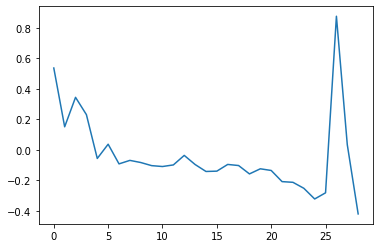

In [9]:
plt.plot(ticker_acf['4631 JT'])

In [10]:
data_logret2 = pd.DataFrame(index = uni_date)

for ticker in data.ticker.unique():
    data_logret2[ticker] = ticker_dict[ticker]['log_ret']**2

In [11]:
ticker_acf2 = {}
for ticker in data.ticker.unique():
    ticker_acf2[ticker] = [data_logret2[ticker].iloc[:1500].autocorr(lag) for lag in range(1, 30)]
    for acf in ticker_acf2[ticker]:
        if acf > 0.2:
            print(ticker)

1332 JT
1334 JT
2432 JT
3101 JT
3101 JT
3863 JT
3863 JT
3863 JT
3865 JT
3893 JT
3893 JT
3893 JT
4324 JT
4452 JT
4503 JT
4506 JT
4631 JT
4631 JT
4631 JT
4631 JT
4689 JT
4751 JT
4751 JT
5002 JT
5101 JT
5202 JT
5401 JT
5401 JT
5411 JT
5901 JT
6361 JT
6701 JT
6752 JT
6758 JT
6758 JT
6770 JT
6976 JT
7011 JT
7211 JT
7261 JT
7261 JT
7731 JT
7951 JT
8766 JT
9022 JT
9107 JT
9766 JT
